In [28]:
import os
import cv2
import random
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

In [2]:
datasetPath = './flowers/'
os.listdir(datasetPath)

['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']

In [23]:
labels = ['dandelion', 'daisy','tulip','sunflower','rose']
img_size = 100
def get_data(data_dir):
    data = [] 
    targets = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append(resized_arr)
                targets.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data), np.array(targets)


In [24]:
data, targets = get_data(datasetPath)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


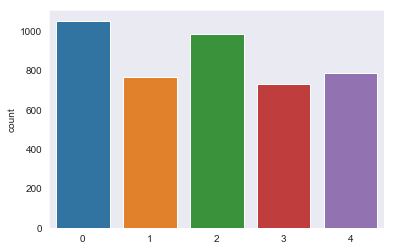

In [25]:
sns.set_style('dark')
sns.countplot(targets)
plt.show()

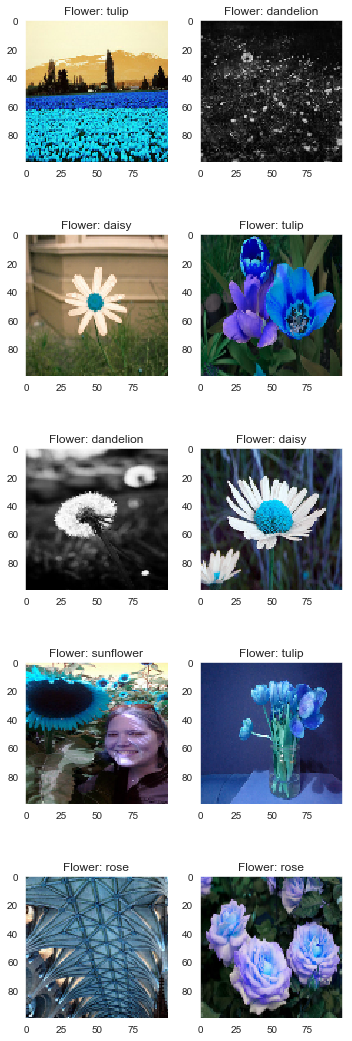

In [26]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(5,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l])
        ax[i,j].set_title('Flower: '+labels[targets[l]])
        
plt.tight_layout()

In [7]:
data.shape, targets.shape

((4317, 100, 100), (4317,))

In [8]:
data = data.reshape(4317, 10000)

In [9]:
X = MinMaxScaler().fit_transform(data)

In [10]:
print("splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = tts(X, targets, test_size=0.2, random_state=42)

splitting dataset into train and test sets...


In [11]:
def compute_cost(W, X, Y):
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = reg_strength * (np.sum(distances) / N)   
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

In [12]:
def calculate_cost_gradient(W, X_batch, Y_batch):
    if type(Y_batch)in [np.float64, np.int64]:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])
    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (reg_strength * Y_batch[ind] * X_batch[ind])
        dw += di
    dw = dw/len(Y_batch)  # average
    return dw

In [13]:
def sgd(features, outputs):
    max_epochs = 500
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.001  # in percent
    for epoch in range(1, max_epochs):
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is:{} and Cost is: {}".format(epoch, cost))
            prev_cost = cost
            nth += 1
    return weights

In [14]:
# train the model
reg_strength = 1
learning_rate = 1

print("training started...")
W = sgd(X_train, y_train)
print("training finished.")
print("weights are: {}".format(W))

training started...
Epoch is:1 and Cost is: 3846.7105950227688
Epoch is:2 and Cost is: 1.0
Epoch is:4 and Cost is: 1.0
Epoch is:8 and Cost is: 14457.93300947876
Epoch is:16 and Cost is: 1.0
Epoch is:32 and Cost is: 1.0
Epoch is:64 and Cost is: 1.0
Epoch is:128 and Cost is: 1180.052048309964
Epoch is:256 and Cost is: 35577.40795757564
Epoch is:499 and Cost is: 1555.3135323545582
training finished.
weights are: [0.62352941 0.61176471 0.62352941 ... 0.31372549 0.31372549 0.30588235]


In [15]:
# testing the model on test set
y_test_predicted = np.array([])
for i in range(X_test.shape[0]):
    yp = np.sign(np.dot(W, X_test[i])) #model
    y_test_predicted = np.append(y_test_predicted, yp)
print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))
print("recall on test dataset: {}".format(recall_score(y_test, y_test_predicted, average='weighted')))
print("precision on test dataset: {}".format(precision_score(y_test, y_test_predicted, average='weighted')))

accuracy on test dataset: 0.1863425925925926
recall on test dataset: 0.1863425925925926
precision on test dataset: 0.034723561814128945


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
testImage = cv2.imread("./flowers/dandelion/10200780773_c6051a7d71_n.jpg", 0)

In [17]:
image = cv2.resize(testImage, (100,100))

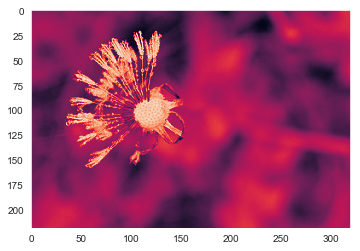

In [18]:
plt.imshow(testImage)
plt.show()

In [19]:
image = image.reshape(10000)

In [20]:
yp = np.sign(np.dot(W, image))

In [21]:
yp

1.0

In [22]:
print("Predicted flower is", labels[int(yp)])

Predicted flower is daisy
